In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import skew
from mpl_toolkits.mplot3d import Axes3D  
import plotly.express as px

In [2]:
df = pd.read_csv("C:/Users/USER/Desktop/Machine Learning/SVM_XGBoost_RF/Employee-Attrition.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


--- 

I want to see the value counts of each categorical value

In [8]:
df['BusinessTravel'].value_counts()   #Travel_Rarely(1043), Travel_Frequently(277), Non-Travel(150). 

df['Department'].value_counts()       #Research & Development(961), Sales(446),  Human Recources(63)

df['EducationField'].value_counts()   #Life Sciences(606), Medical(464), Marketing(159),  Technical Degree(132), Other(82), Human Resources (27)

df['JobRole'].value_counts()          # Sales Executive(326), Research Scientist(292), Laboratory Technician(259), Manufacturing Director(145), Healthcare Representative(131)
                                      # Manager(102), Sales Representative(83), Research Director(80), Human Resources(52)

df['MaritalStatus'].value_counts()    # Married (673), Single(470), Divorced(327)

df['OverTime'].value_counts()         # No(1054), Yes(416)

OverTime
No     1054
Yes     416
Name: count, dtype: int64

---

Let's map some binary categorical values to 0/1

In [9]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

In [10]:
df.groupby('Education')['Attrition'].mean()

Education
1    0.182353
2    0.156028
3    0.173077
4    0.145729
5    0.104167
Name: Attrition, dtype: float64

In [11]:
df.groupby('Gender')['Attrition'].mean()

Gender
0    0.170068
1    0.147959
Name: Attrition, dtype: float64

In [12]:
df.groupby('WorkLifeBalance')['Attrition'].mean()

WorkLifeBalance
1    0.312500
2    0.168605
3    0.142217
4    0.176471
Name: Attrition, dtype: float64

In [13]:
df.groupby('OverTime')['Attrition'].mean()

OverTime
0    0.104364
1    0.305288
Name: Attrition, dtype: float64

---

## <span style="color:green">Here's why certain features should be dropped from the dataset:</span>


> Redundant & Non-Predictive Features

* **EmployeeCount**: This is a *constant value* across all rows. It offers no variation, so it provides no predictive power for a model.
* **EmployeeNumber**: A *unique identifier* for each employee. It's not a predictor and can lead to *overfitting* because the model might memorize specific IDs instead of learning general patterns.
* **Over18**: Another *constant value* ("Y" for all employees). Like EmployeeCount, its lack of variation makes it useless for prediction.
* **StandardHours**: Also a *constant value* (e.g., 40 for all). No variance means the model can't learn anything from it.


> No Meaningful Information / Adds Noise

* **DailyRate, MonthlyRate, HourlyRate**: These are often internal administrative metrics. They frequently don't directly correlate with employee satisfaction or attrition risk. As visually confirmed by their boxplots (below), they add no meaningful information and can introduce noise into our model, making it less effective.

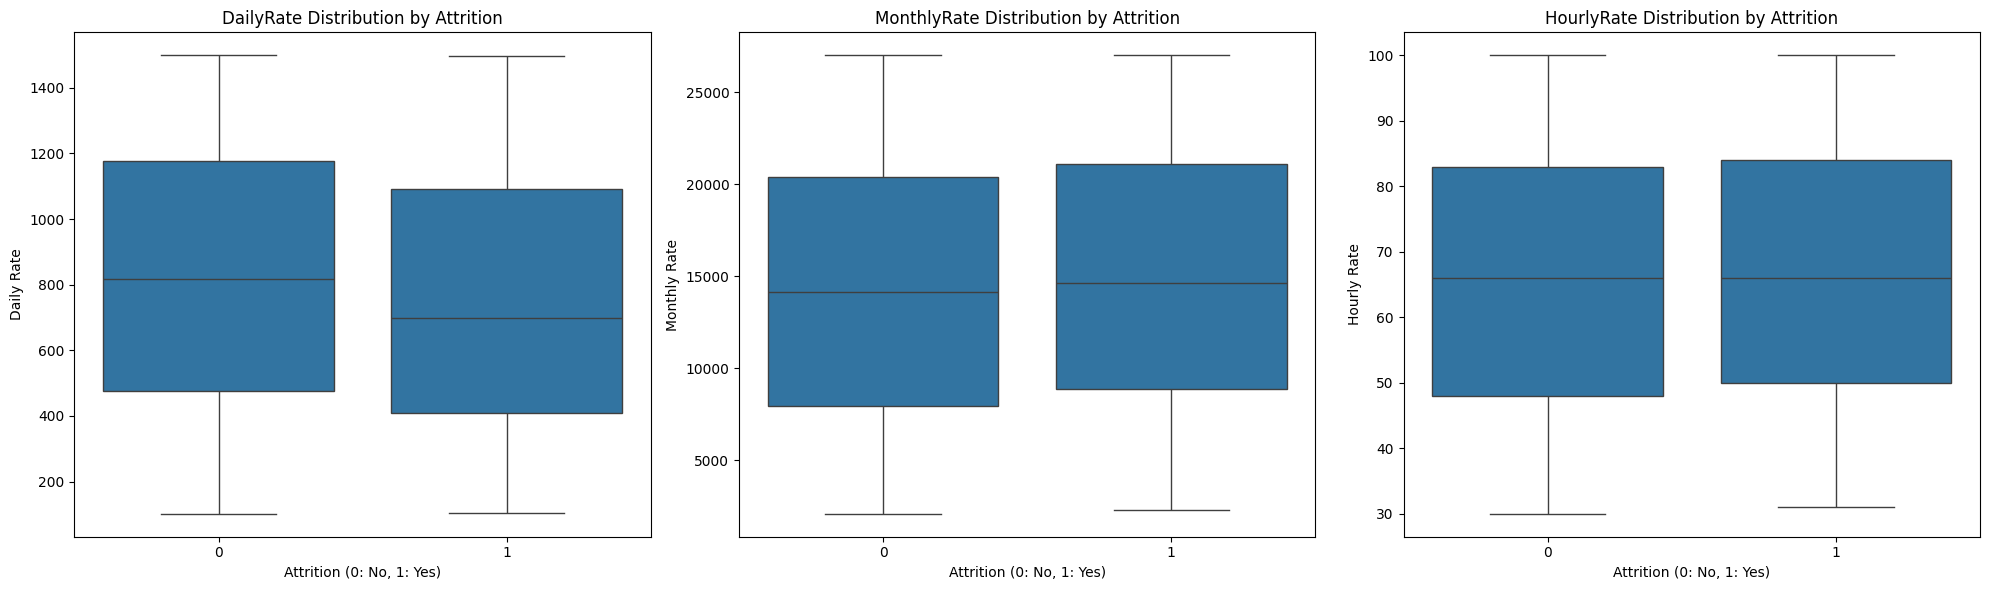

In [14]:
# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# DailyRate vs. Attrition
sns.boxplot(x='Attrition', y='DailyRate', data=df, ax=axes[0])
axes[0].set_title('DailyRate Distribution by Attrition')
axes[0].set_xlabel('Attrition (0: No, 1: Yes)')
axes[0].set_ylabel('Daily Rate')

# MonthlyRate vs. Attrition
sns.boxplot(x='Attrition', y='MonthlyRate', data=df, ax=axes[1])
axes[1].set_title('MonthlyRate Distribution by Attrition')
axes[1].set_xlabel('Attrition (0: No, 1: Yes)')
axes[1].set_ylabel('Monthly Rate')

# HourlyRate vs. Attrition
sns.boxplot(x='Attrition', y='HourlyRate', data=df, ax=axes[2])
axes[2].set_title('HourlyRate Distribution by Attrition')
axes[2].set_xlabel('Attrition (0: No, 1: Yes)')
axes[2].set_ylabel('Hourly Rate')

plt.tight_layout()
plt.show()


In [15]:
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'HourlyRate','MonthlyRate', 'DailyRate'])

In [16]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                       int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

--- 

## <span style="color:green">Let's do some outlier detection</span>

The box plots below reveal varying distributions across the different variables. Some variables like **MonthlyIncome**,  **YearsAtCompany**,  **YearsSinceLastPromotion**, and **TotalWorkingYears** show clear positive skewness and the presence of numerous outliers on the higher end, indicating a long tail of individuals with higher values. Other variables like YearsInCurrentRole, YearsWithCurrManager, and DistanceFromHome appear more symmetrical, although DistanceFromHome still has some higher-end outliers. YearsSinceLastPromotion is particularly notable for its low median and a large number of high-value outliers, suggesting a bimodal or highly skewed distribution where many are promoted quickly, but a significant minority wait much longer. **NumCompaniesWorked** shows a relatively compact distribution with a few higher outliers.

---


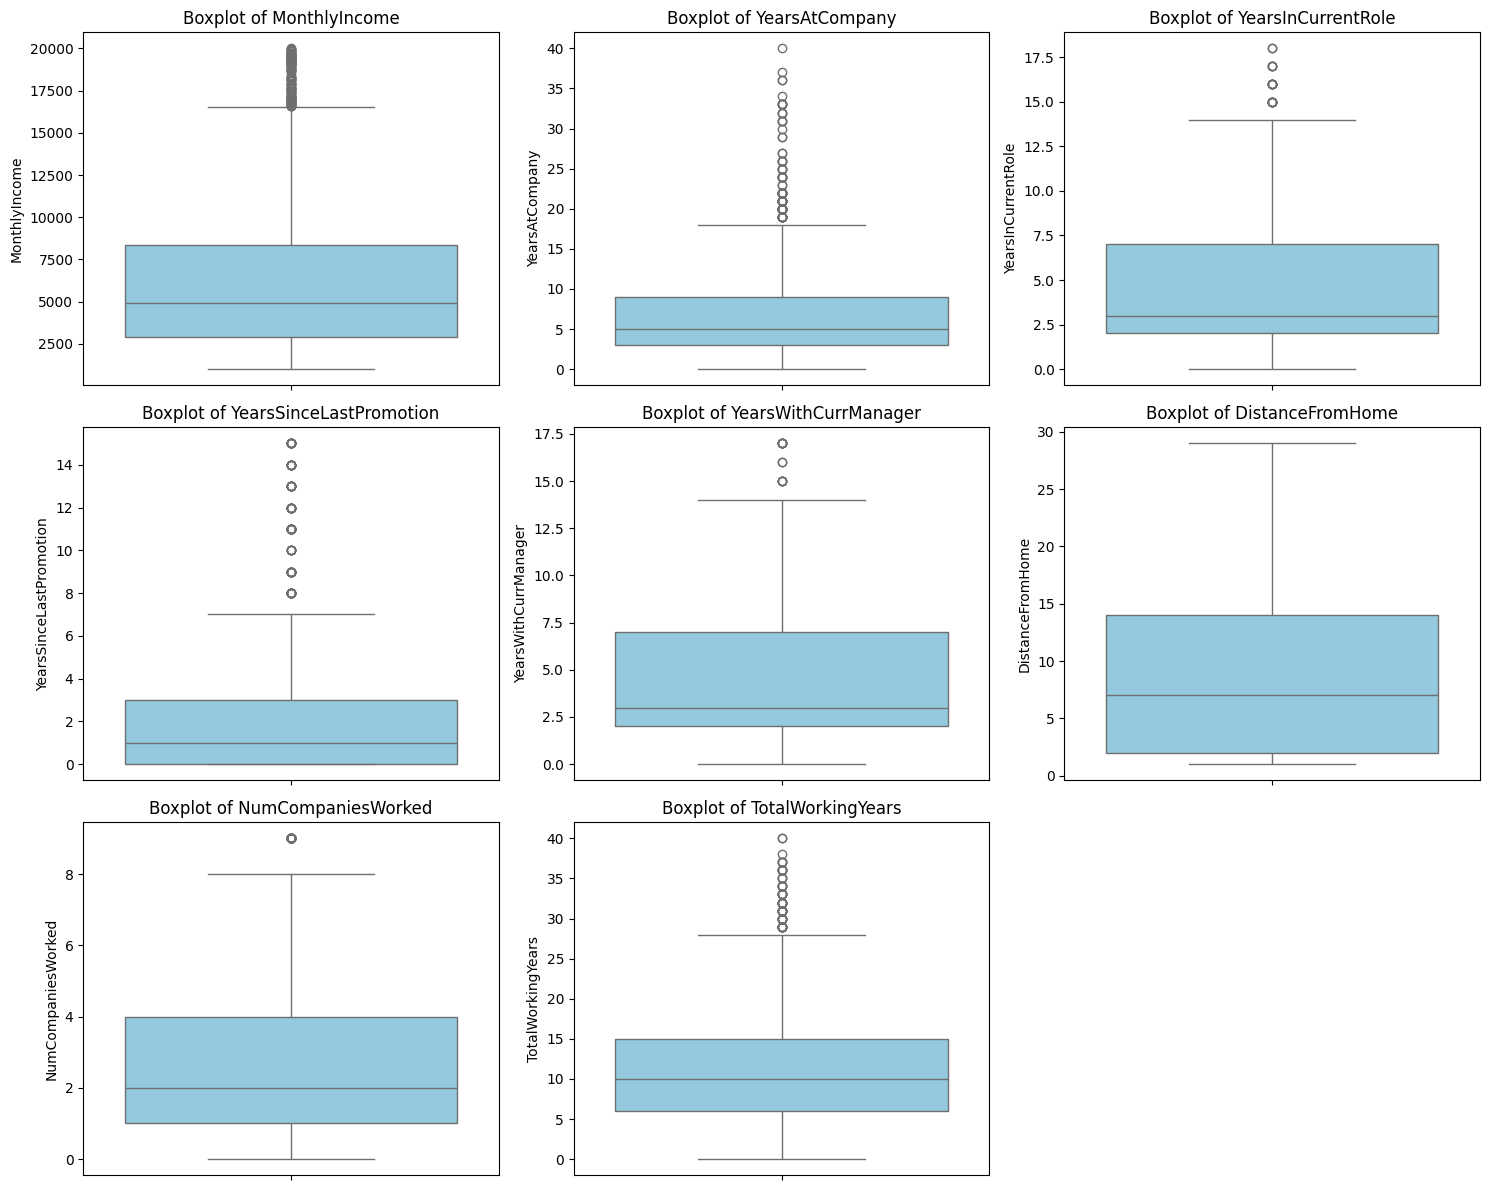

In [17]:
numeric_cols = ['MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 
                'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome',
                'NumCompaniesWorked', 'TotalWorkingYears']

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()



---

In [18]:
num_features = df.select_dtypes(include=[np.number])
corr = num_features.corr()
print(corr['Attrition'].sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
PerformanceRating           0.002889
PercentSalaryHike          -0.013478
Gender                     -0.029453
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64



- Features like TotalWorkingYears, JobLevel, MonthlyIncome, Age, YearsWithCurrManager, and YearsAtCompany have the strongest negative correlations (~ -0.15 to -0.17) with attrition, which means:

- Higher values in these features are associated with lower attrition, e.g., employees who are older, more experienced, higher level, or with longer tenure tend to stay more.

- Features like DistanceFromHome and NumCompaniesWorked have small positive correlations, meaning employees who commute farther or have worked at more companies are slightly more likely to leave.

- Many features have correlations close to zero, indicating weak or no linear relationship with attrition.
---

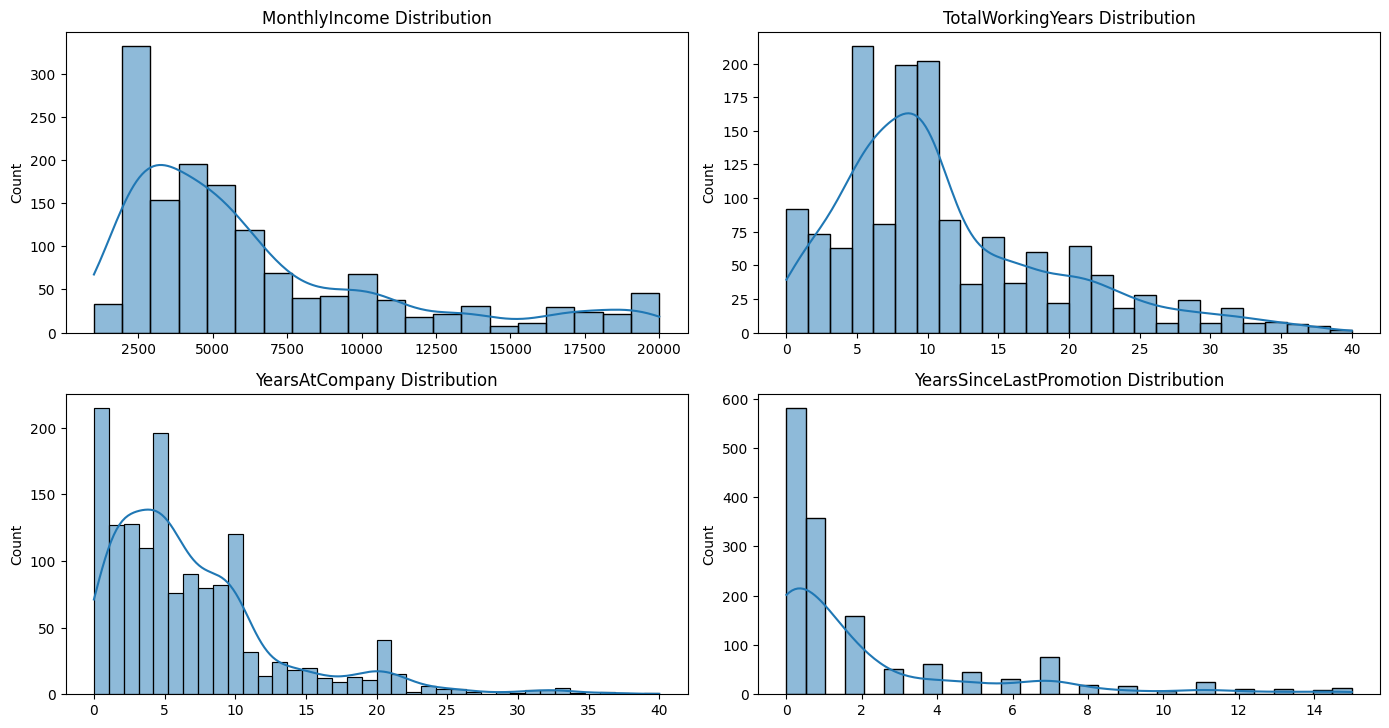

In [19]:
log_transform_features = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']

num_features = len(log_transform_features)
n_rows = (num_features + 1) 
n_cols = 2


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 18)) 
axes = axes.flatten() 

for i, col in enumerate(log_transform_features):
    sns.histplot(df[col], kde=True, ax=axes[i]) # Pass the specific axis to seaborn
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("") 

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

In [20]:
numeric_cols = df[['Age', 'Attrition','DistanceFromHome', 'Education', 'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
                  'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Gender']]

for col in numeric_cols:
    print(f"{col}: {skew(df[col])}")


Age: 0.41286446154785084
Attrition: 1.842483584049465
DistanceFromHome: 0.9571400469829039
Education: -0.2893854052028825
EnvironmentSatisfaction: -0.3213261358382832
JobInvolvement: -0.4979106286269671
JobLevel: 1.0243546583925869
JobSatisfaction: -0.3293354633089524
MonthlyIncome: 1.3684185123330814
NumCompaniesWorked: 1.0254233954371303
PercentSalaryHike: 0.8202898522796266
PerformanceRating: 1.9199210412109473
RelationshipSatisfaction: -0.3025184698222079
StockOptionLevel: 0.9679912809556104
TotalWorkingYears: 1.11603155825941
TrainingTimesLastYear: 0.5525595985771926
WorkLifeBalance: -0.5519163838185224
YearsAtCompany: 1.7627284034822992
YearsInCurrentRole: 0.9164268059808774
YearsSinceLastPromotion: 1.982264623462895
YearsWithCurrManager: 0.8326002906209379
Gender: 0.4082482904638628


In [21]:
df['MonthlyIncome'] = np.log1p(df['MonthlyIncome'])
df['TotalWorkingYears'] = np.log1p(df['TotalWorkingYears'])
df['YearsAtCompany'] = np.log1p(df['YearsAtCompany'])
df['YearsSinceLastPromotion'] = np.log1p(df['YearsSinceLastPromotion'])
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,1,3,...,3,1,0,2.197225,0,1,1.945910,4,0.000000,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,0,2,...,4,4,1,2.397895,3,3,2.397895,7,0.693147,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,0,2,...,3,2,0,2.079442,3,3,0.000000,0,0.000000,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,1,3,...,3,3,0,2.197225,3,3,2.197225,7,1.386294,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,0,3,...,3,4,1,1.945910,3,3,1.098612,2,1.098612,2


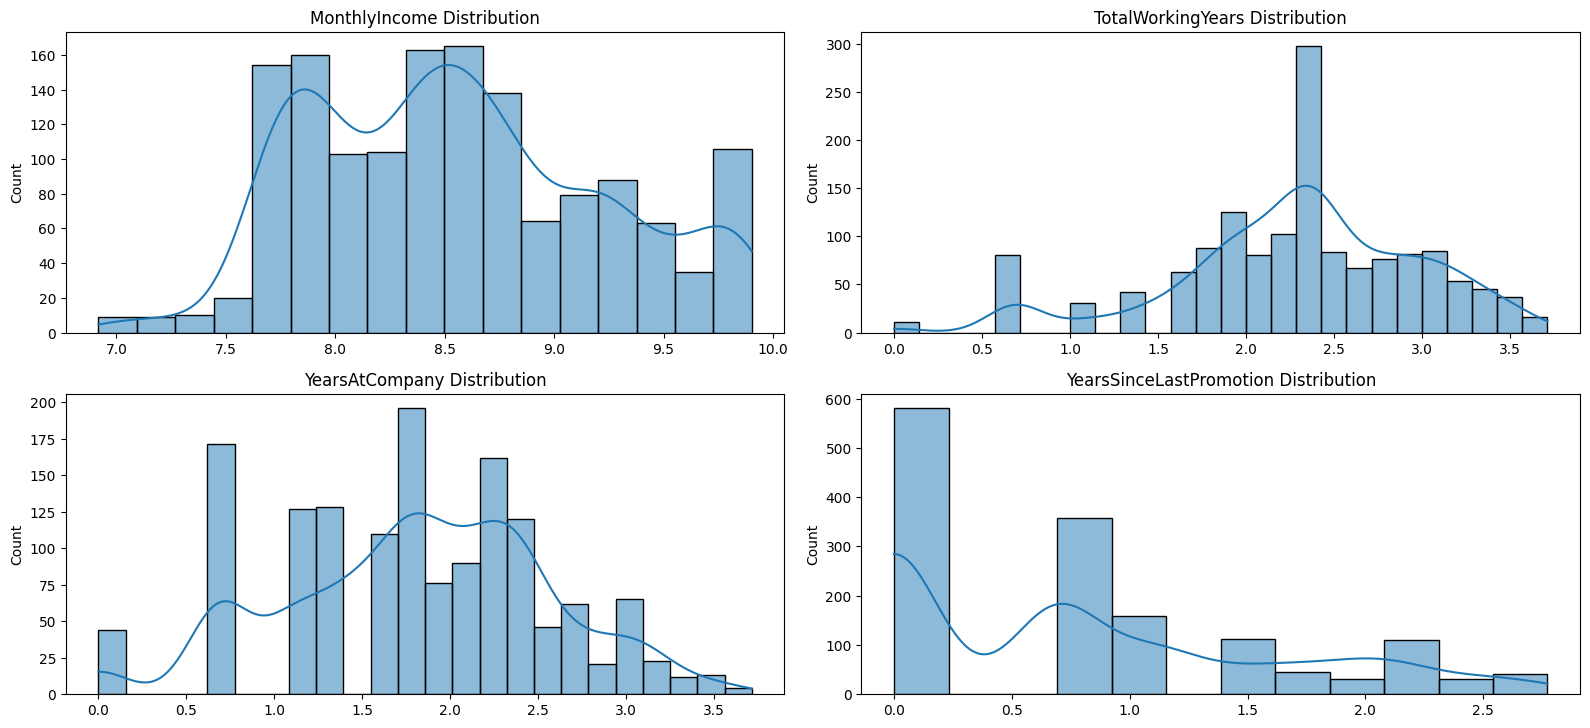

In [22]:
log_transformed_features = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']

num_features = len(log_transformed_features)
n_rows = (num_features + 1) 
n_cols = 2

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 18)) 
axes = axes.flatten() 

for i, col in enumerate(log_transform_features):
    sns.histplot(df[col], kde=True, ax=axes[i]) # Pass the specific axis to seaborn
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("") 

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()


---
### **FEATURE ENGINEERING**
---
*`Derived Ratios / Rates`*

Creating derived features like ratios or rates is valuable because it lets your model see relationships that are not immediately obvious from raw features. Ratios often help you express change over time, pace, or acceleration, which are key in attrition. For example SwitchRate measures job-hopping behavior.

It can also be helpful to normalize across individuals. Raw values like TrainingTimesLastYear may be misleading: 3 training sessions in 1 year at company ≠ 3 trainings over 10 years. TrainRate gives a personalized measure of how often the employee trains. 

This approach mimics human reasoning. Humans often think in ratios, not raw numbers. "He's worked 5 years and only got promoted once" is more informative than “Worked 5 years” and “1 promotion”


In [23]:
df['PromotionRate'] = df['YearsAtCompany'] / (df['YearsSinceLastPromotion'] + 1)
df['TrainRate'] = df['TrainingTimesLastYear'] / (df['YearsAtCompany'] + 1)
df['SwitchRate'] = df['NumCompaniesWorked'] / (df['TotalWorkingYears'] + 1)

--- 

*`Binary Features`*

1. IsRecentlyPromoted: Indicates career growth; may reduce attrition risk.

2. IsNewInRole: Captures adaptation period; recent role changes affect stability.

3. IsNewInCompany: First-year employees are more likely to leave; high attrition risk.

4. IsManagerSameSinceJoining: Stable leadership can increase satisfaction and retention.


In [24]:
df['IsRecentlyPromoted'] = df['YearsSinceLastPromotion'].apply(lambda x: 1 if x <= 1 else 0)
df['IsNewInRole'] = df['YearsInCurrentRole'].apply(lambda x: 1 if x <= 1 else 0)
df['IsNewInCompany'] = df['YearsAtCompany'].apply(lambda x: 1 if x <= 1 else 0)  
df['IsFemaleLowSatisfaction'] = ((df['Gender'] == 0) & (df['JobSatisfaction'] <= 2)).astype(int)

--- 
*`Interactive Terms`*

In [25]:
df['Age_YearsAtCompany'] = df['Age'] * df['YearsAtCompany']
df['JobSatisfaction_MonthlyIncome'] = df['JobSatisfaction'] * df['MonthlyIncome']
df['YearsWithCurrManager_JobInvolvement'] = df['YearsWithCurrManager'] * df['JobInvolvement']

- Age * YearsAtCompany: This interaction is often highly relevant in workforce analytics. It helps differentiate between younger, less experienced employees who leave quickly (early attrition) and older, more tenured employees who might be leaving due to stagnation or retirement

- JobSatisfaction * MonthlyIncome: This combination addresses a core aspect of employee motivation and retention: are employees leaving because they're unhappy, underpaid, or a combination of both? It helps identify if a lack of satisfaction is tolerated with higher pay, or if even good pay isn't enough to retain highly dissatisfied employees.

- YearsWithCurrManager * JobInvolvement: The relationship with one's manager and engagement in the role are critical drivers of employee retention. This interaction can shed light on whether long-term relationships with a manager lead to higher or lower job involvement, and how that impacts attrition. For example, a long time with the same manager could indicate a strong bond and commitment. 

---

## **More Visualizations**

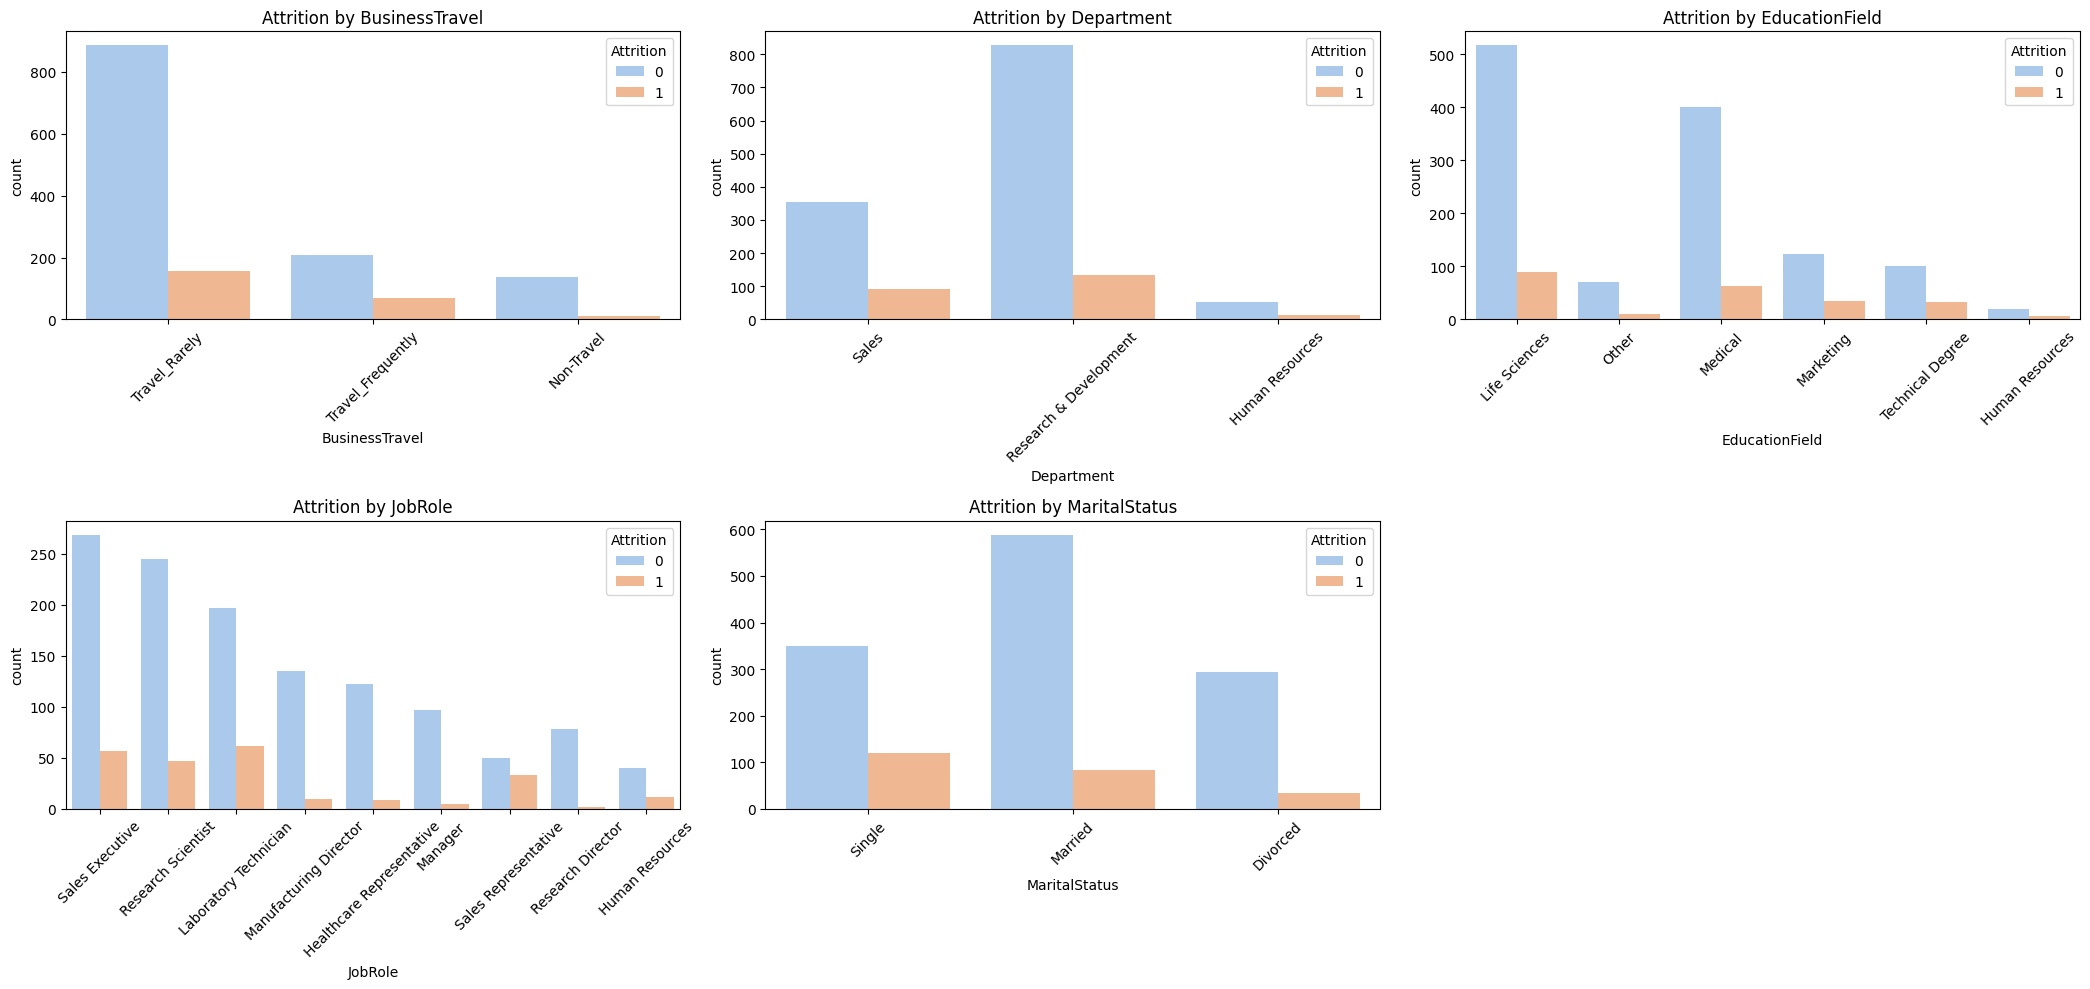

In [26]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Attrition']

# Number of plots per row
plots_per_row = 3
n_cols = plots_per_row
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

# Set plot size
plt.figure(figsize=(n_cols * 7, n_rows * 5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='Attrition', palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'Attrition by {col}')
    plt.tight_layout()

plt.show()


---

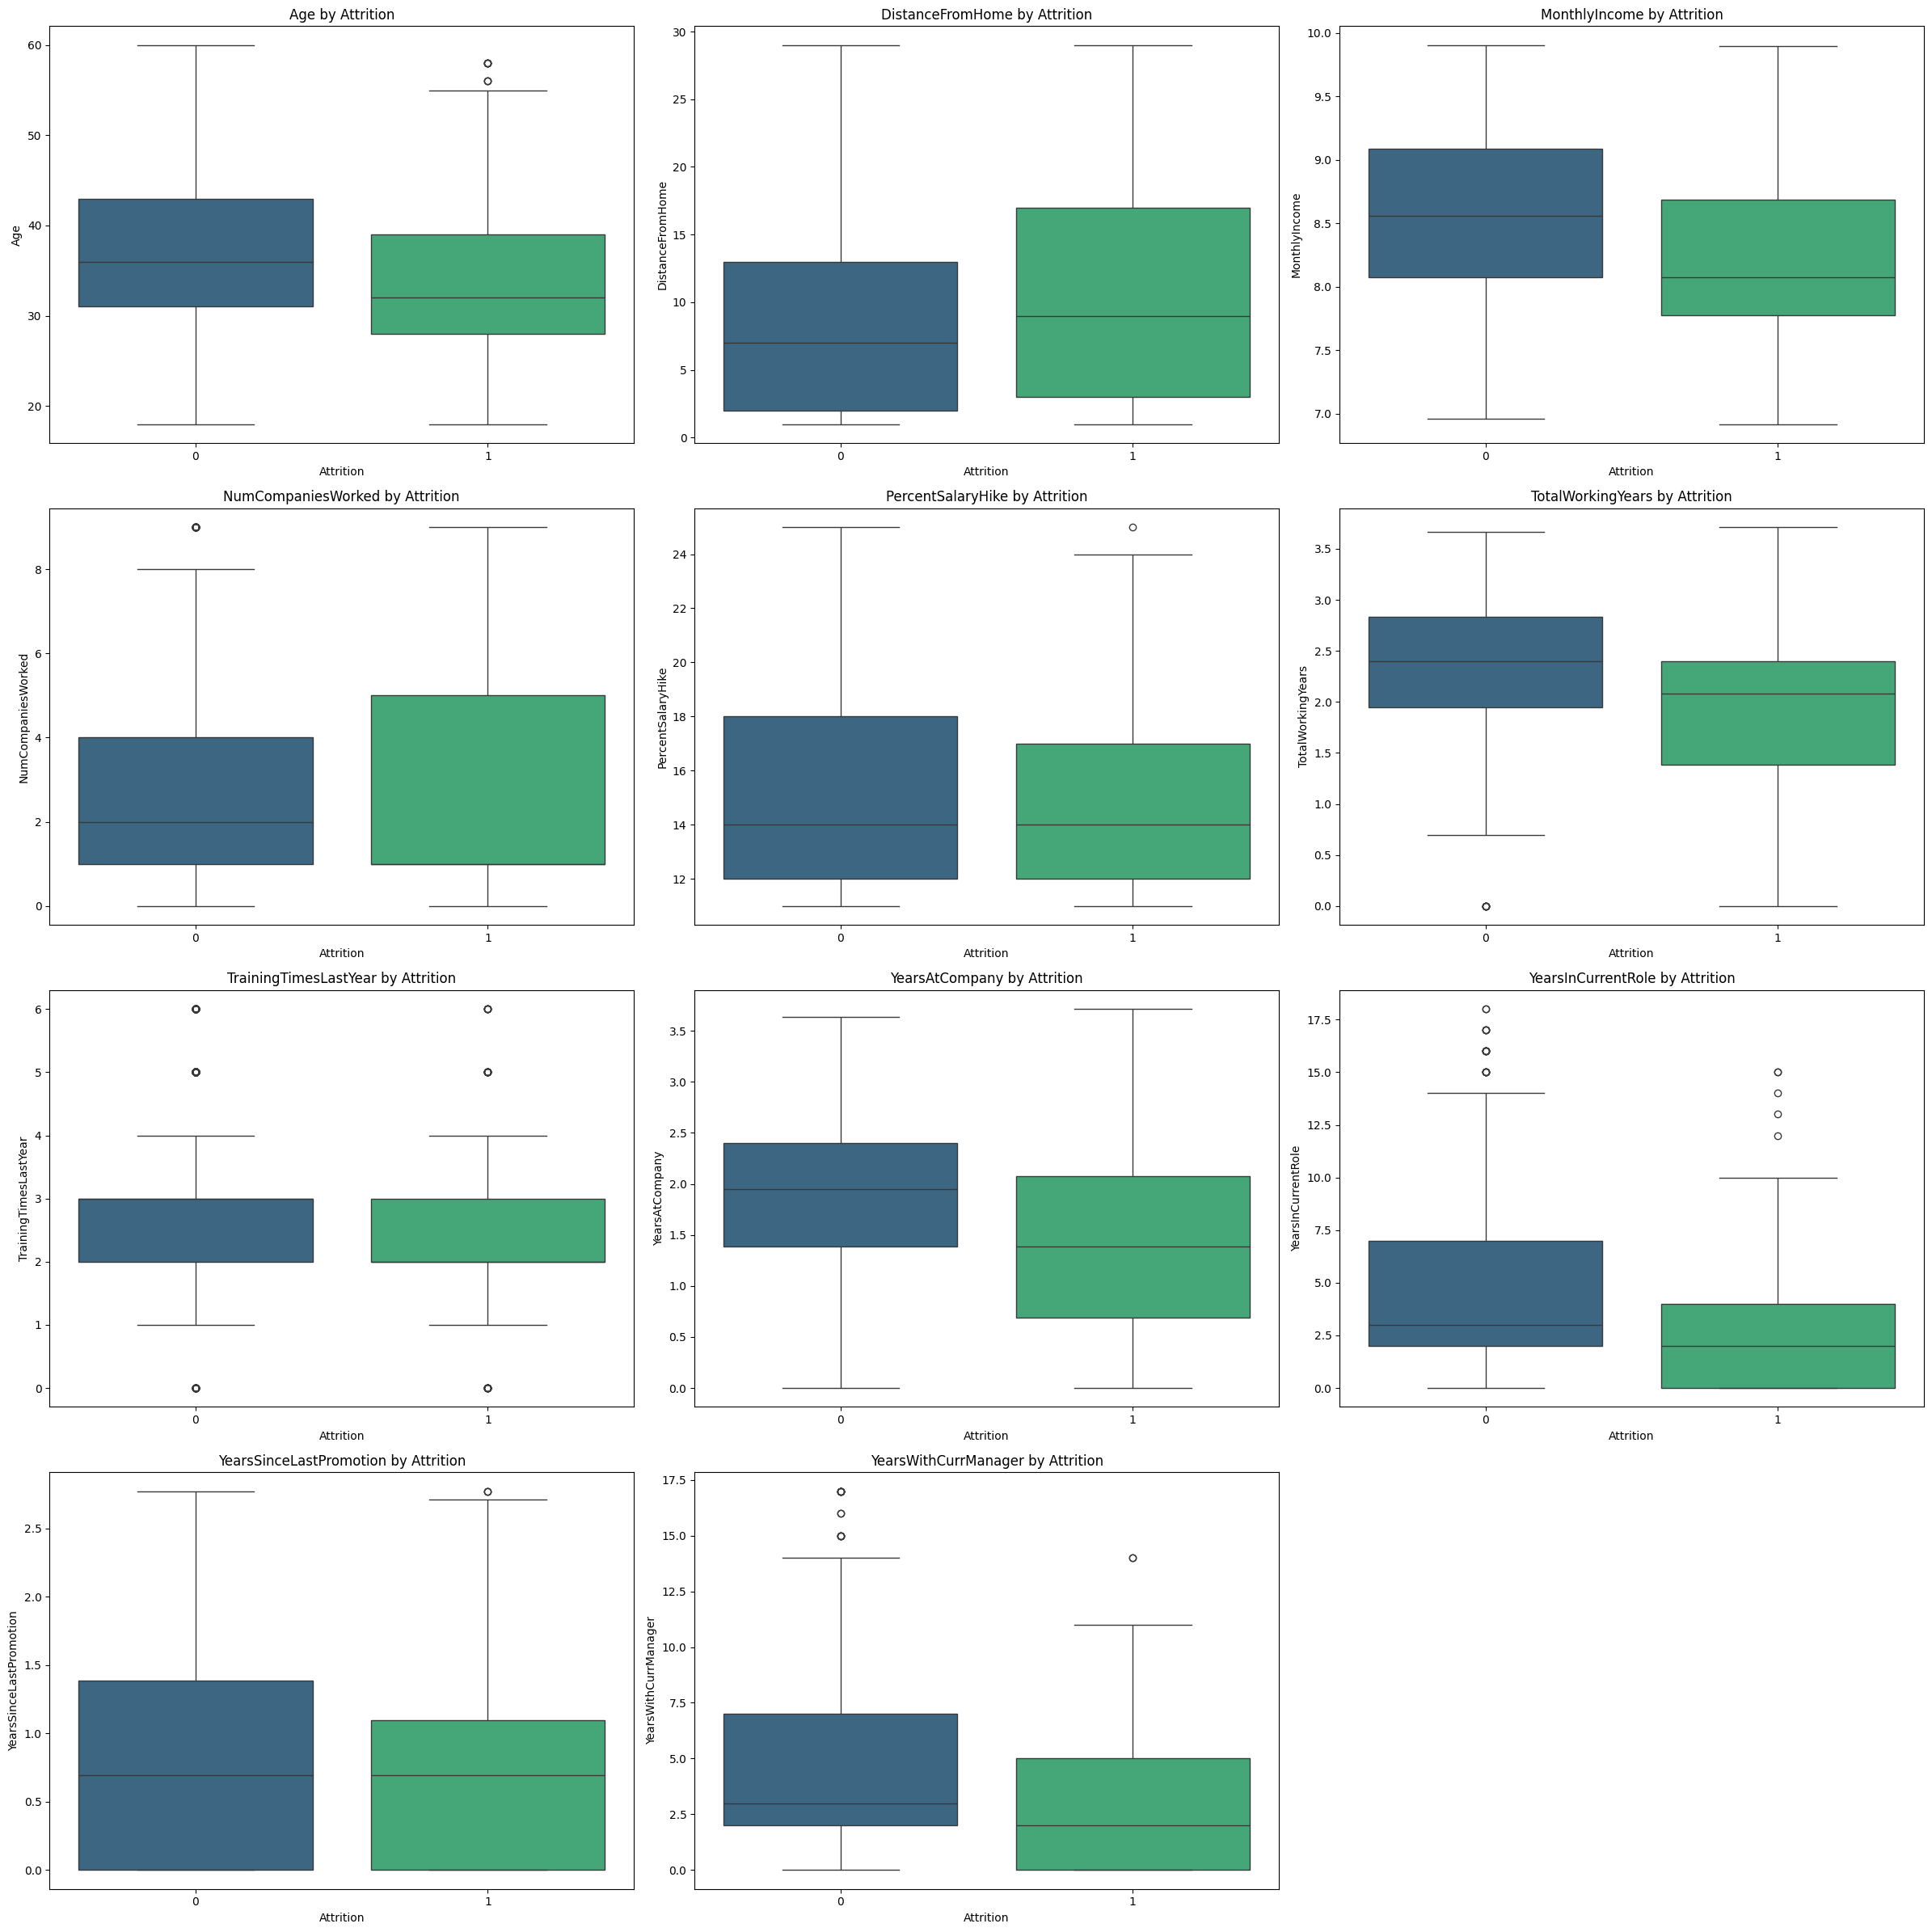

In [27]:
numerical_cols_for_plot = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears',
                           'TrainingTimesLastYear', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager'
]

numerical_cols_for_plot = [col for col in numerical_cols_for_plot if col in df.columns and np.issubdtype(df[col].dtype, np.number)]

plots_per_row = 3
n_cols = plots_per_row
n_rows = int(np.ceil(len(numerical_cols_for_plot) / n_cols))


plt.figure(figsize=(n_cols * 8, n_rows * 6)) # Slightly larger for better readability of numerical plots

for i, col in enumerate(numerical_cols_for_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x='Attrition', y=col, hue='Attrition', palette='viridis', legend=False)
    plt.title(f'{col} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

---

`PCA ANALYSIS`

The following discussions revolve around the interpretability of PCA plots for an attrition dataset and the subsequent implications for classification difficulty

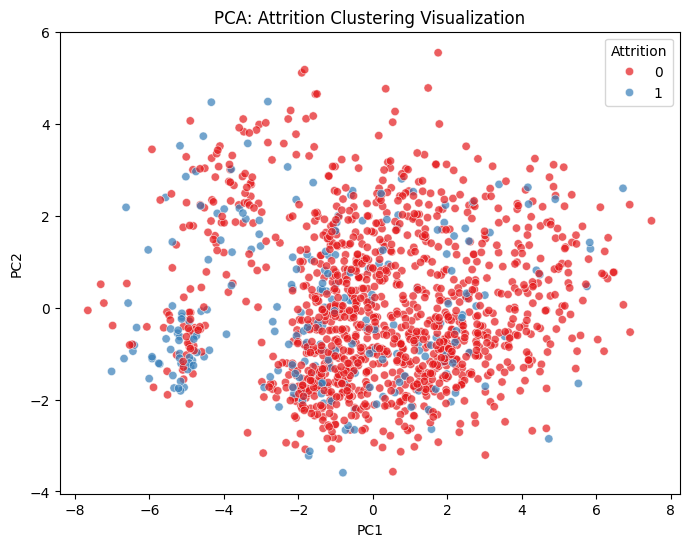

In [28]:
numeric_df = df.select_dtypes(include='number').drop(columns=['Attrition']) 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Attrition'] = df['Attrition']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Attrition', palette='Set1', alpha=0.7)
plt.title('PCA: Attrition Clustering Visualization')
plt.show()


Initially, I examined a 2D PCA visualization, noting the substantial overlap between employees who stayed (Attrition=0) and those who left (Attrition=1). This indicated a lack of clear linear separability in the two most significant principal components.

---

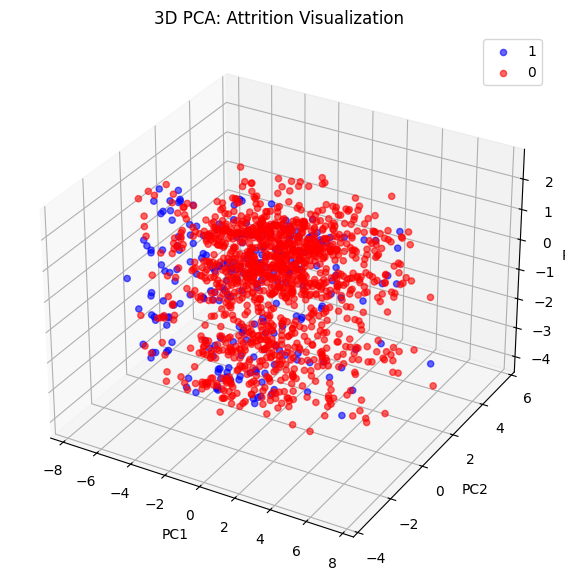

In [29]:
# Scale numeric features
numeric = df.select_dtypes(include='number').drop(columns=['Attrition'])  # Ensure Attrition is excluded if it's numeric
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric)

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create PCA dataframe
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Attrition'] = df['Attrition']

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = {0: 'red', 1: 'blue'}

for attrition_value in pca_df['Attrition'].unique():
    subset = pca_df[pca_df['Attrition'] == attrition_value]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               c=colors[attrition_value], label=str(attrition_value), alpha=0.6)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA: Attrition Visualization')
ax.legend()
plt.show()


Upon reviewing a 3D PCA plot, including PC3, the situation remained consistent: the attrition groups still showed considerable interspersal, with no distinct clusters or easy boundaries. This led to the immediate conclusion that, based on these principal component views, classifying attrition would likely be challenging, especially for simple linear models.

---

In [30]:
# Select numeric features and scale
numeric = df.select_dtypes(include='number').drop(columns=['Attrition'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric)

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Attrition'] = df['Attrition']  # 0 or 1

# Set custom color map: 0 → red, 1 → blue
color_map = {0: 'red', 1: 'blue'}

# Plot with Plotly
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Attrition',
    color_discrete_map=color_map,
    title='3D PCA: Attrition Visualization (Interactive)',
    opacity=0.5
)

# Increase figure size
fig.update_layout(
    width=900,
    height=700,
    legend_title_text='Attrition'
)

fig.show()


The PCA plots suggested that the most significant variations in the dataset itself are not directly aligned with the patterns distinguishing attrition. This implies that the signal for attrition is either very subtle, highly complex, or embedded in intricate interactions among features that aren't captured prominently by the initial principal components. Therefore, the task remains demanding, requiring models to uncover a hidden or less obvious signal within the data.

---
## **Final State of the Data**

In [31]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PromotionRate,TrainRate,SwitchRate,IsRecentlyPromoted,IsNewInRole,IsNewInCompany,IsFemaleLowSatisfaction,Age_YearsAtCompany,JobSatisfaction_MonthlyIncome,YearsWithCurrManager_JobInvolvement
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,1,3,...,1.945910,0.000000,2.502170,1,0,0,0,79.782316,34.794057,15
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,0,2,...,1.416236,0.882899,0.294300,1,0,0,1,117.496868,17.086112,14
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,0,2,...,0.000000,3.000000,1.948405,1,1,1,0,0.000000,22.936193,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,1,3,...,0.920768,0.938314,0.312771,0,0,0,0,72.508411,23.927725,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,0,3,...,0.523495,1.429516,3.055083,0,0,0,1,29.662532,16.303243,6


In [32]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PromotionRate,TrainRate,SwitchRate,IsRecentlyPromoted,IsNewInRole,IsNewInCompany,IsFemaleLowSatisfaction,Age_YearsAtCompany,JobSatisfaction_MonthlyIncome,YearsWithCurrManager_JobInvolvement
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,0.400000,2.729932,2.063946,2.728571,8.552752,...,1.121177,1.102533,0.805758,0.638095,0.204762,0.146259,0.225850,68.745192,23.333407,11.321769
std,9.135373,0.367863,8.106864,1.024165,1.093082,0.490065,0.711561,1.106940,1.102846,0.664313,...,0.574918,0.722358,0.730782,0.480715,0.403665,0.353485,0.418283,37.031813,9.633764,10.467975
min,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,6.917706,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.995766,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,7.976595,...,0.693147,0.678907,0.294300,0.000000,0.000000,0.000000,0.000000,42.975125,15.916278,4.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,0.000000,3.000000,2.000000,3.000000,8.501061,...,0.950560,0.953011,0.590616,1.000000,0.000000,0.000000,0.000000,65.536286,24.879144,8.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,1.000000,3.000000,3.000000,4.000000,9.033603,...,1.416236,1.298937,1.176458,1.000000,0.000000,0.000000,0.000000,88.722125,31.622133,20.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,9.903488,...,3.526361,6.000000,3.771538,1.000000,1.000000,1.000000,1.000000,215.387180,39.583031,60.000000


In [33]:
df.shape

(1470, 38)

In [34]:
df.isnull().any()

Age                                    False
Attrition                              False
BusinessTravel                         False
Department                             False
DistanceFromHome                       False
Education                              False
EducationField                         False
EnvironmentSatisfaction                False
Gender                                 False
JobInvolvement                         False
JobLevel                               False
JobRole                                False
JobSatisfaction                        False
MaritalStatus                          False
MonthlyIncome                          False
NumCompaniesWorked                     False
OverTime                               False
PercentSalaryHike                      False
PerformanceRating                      False
RelationshipSatisfaction               False
StockOptionLevel                       False
TotalWorkingYears                      False
TrainingTi

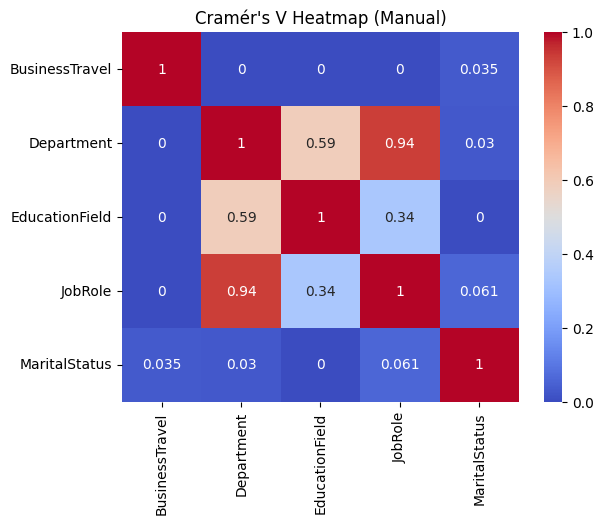

In [35]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Build matrix
categorical_cols = df.select_dtypes(include='object').columns
n = len(categorical_cols)
matrix = pd.DataFrame(np.zeros((n, n)), columns=categorical_cols, index=categorical_cols)

for i in range(n):
    for j in range(n):
        matrix.iloc[i, j] = cramers_v(df[categorical_cols[i]], df[categorical_cols[j]])

sns.heatmap(matrix, annot=True, cmap="coolwarm")
plt.title("Cramér's V Heatmap (Manual)")
plt.show()

In [36]:
df = df.drop(columns=['Department'])

We have a very high correlation between JobRole and Department which is what I expected. So dropping one of them would help us reduce redundancy

---

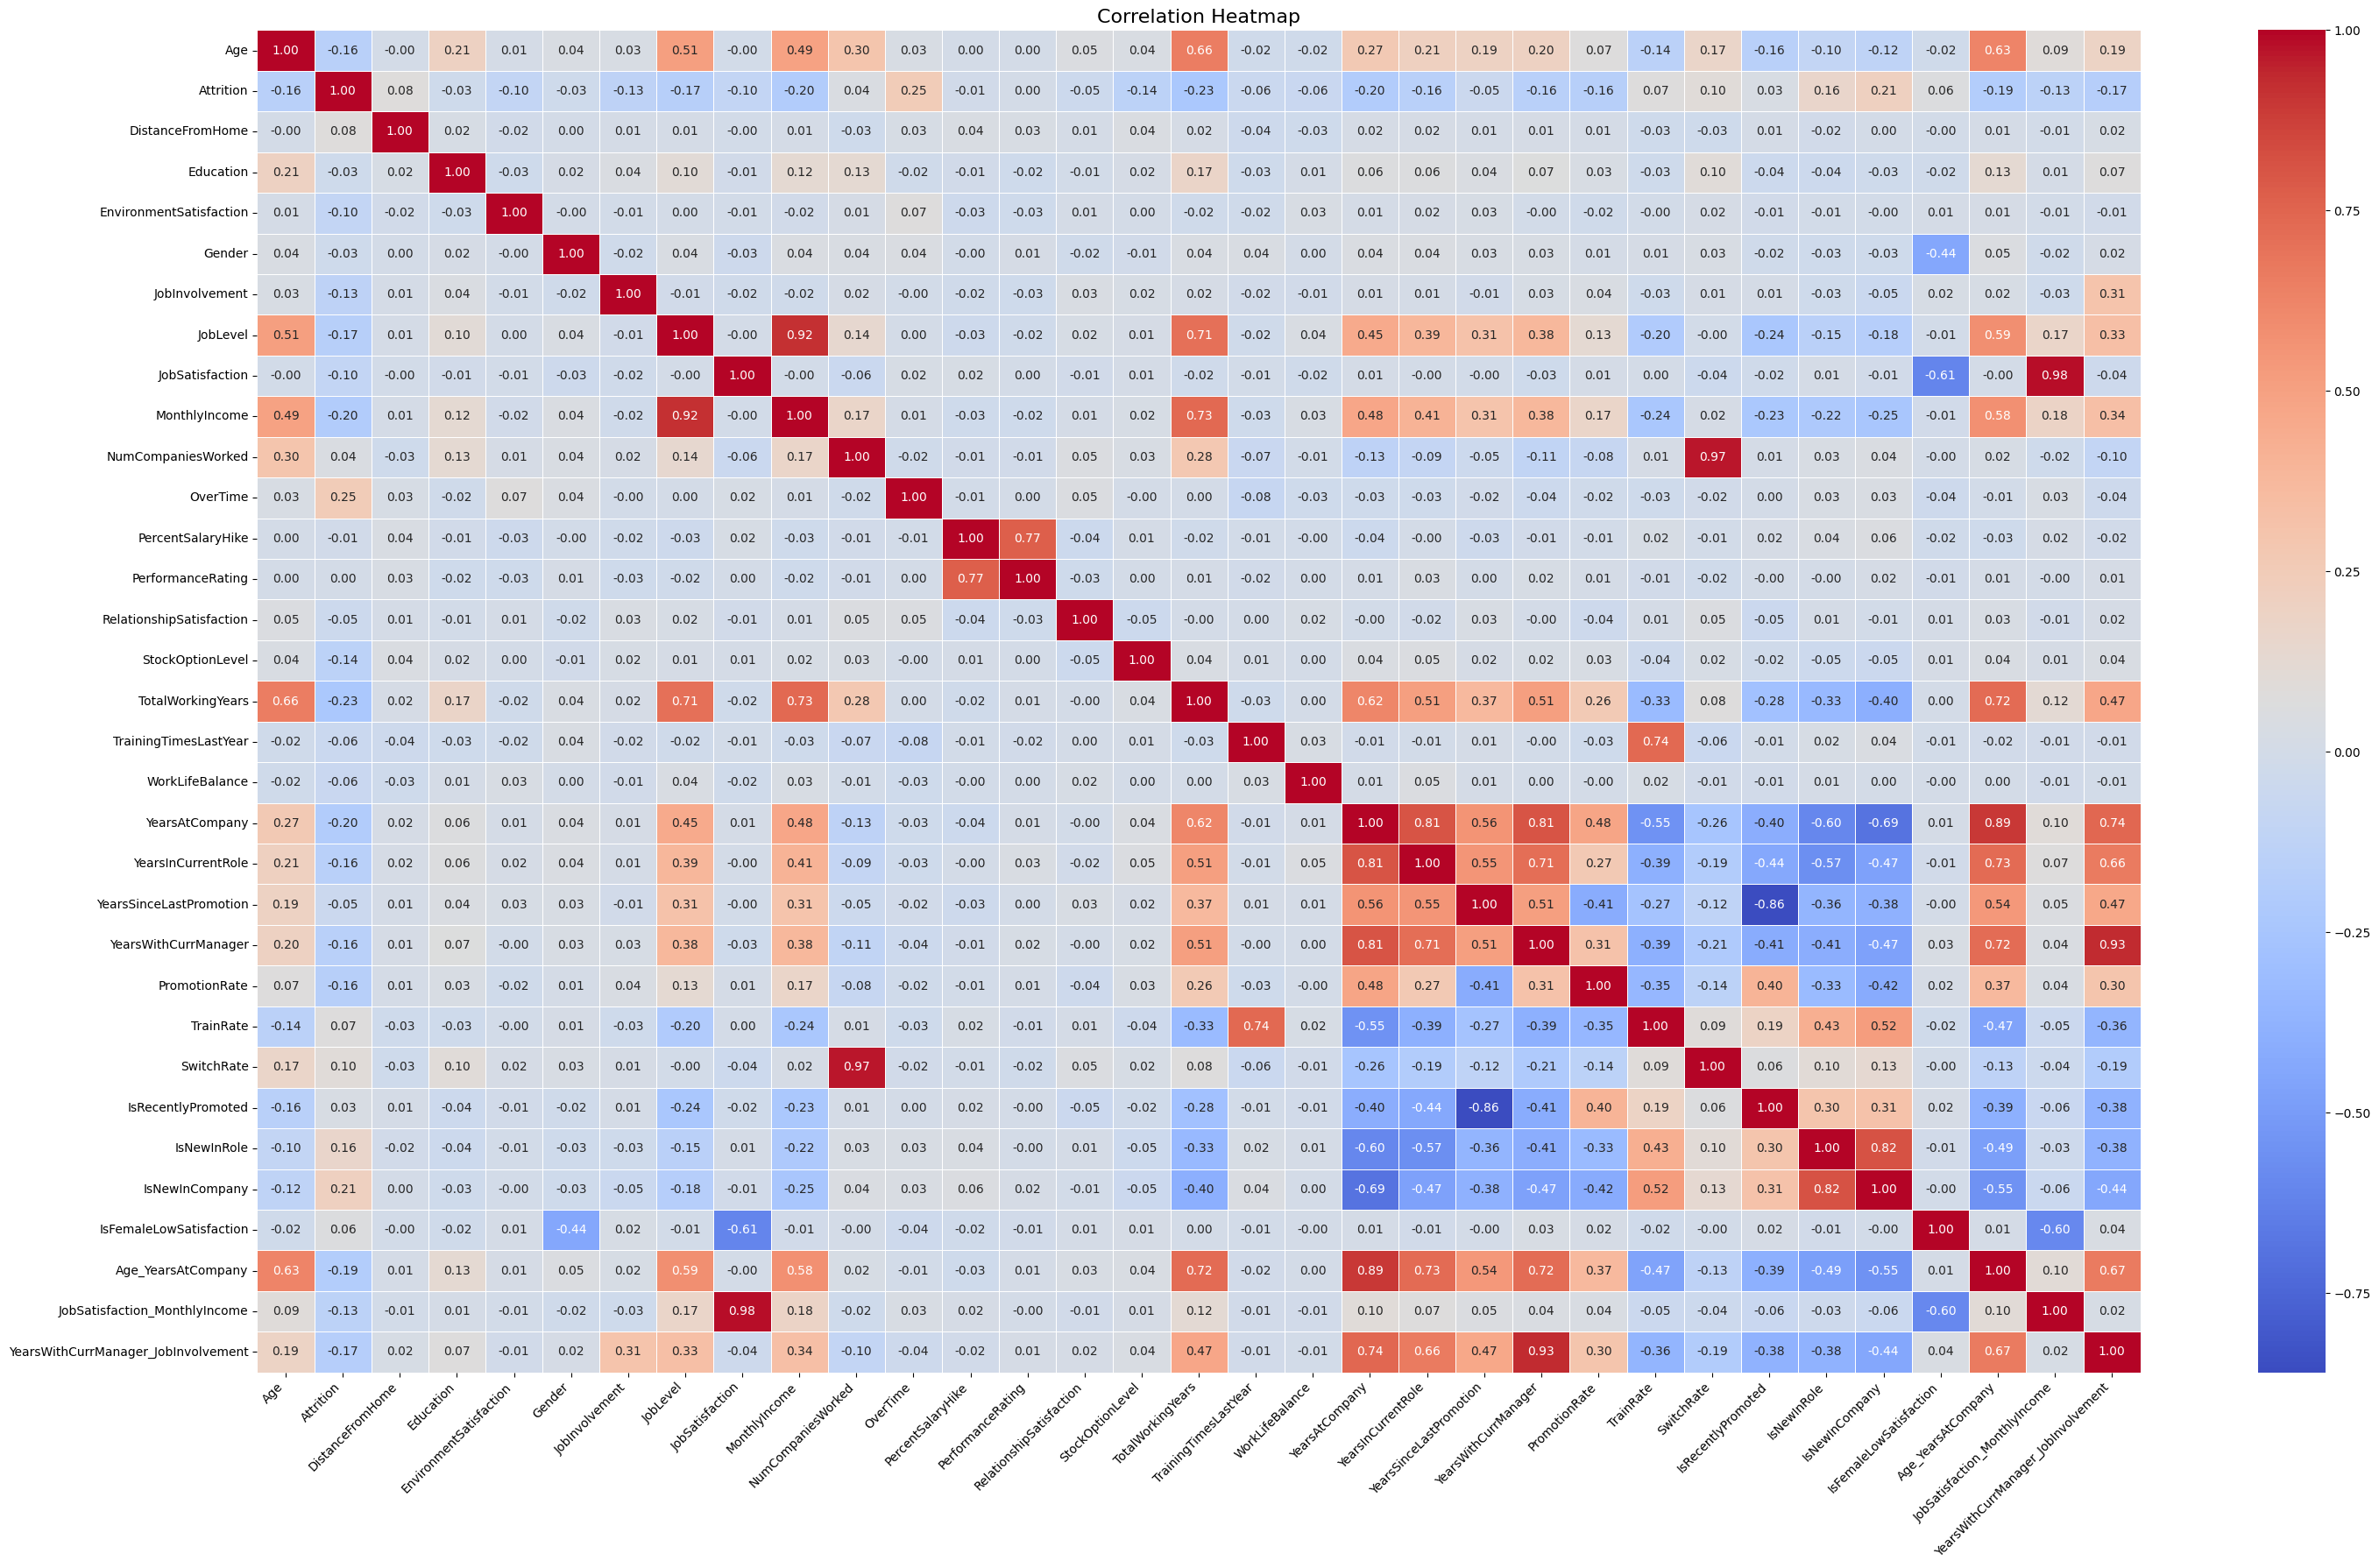

In [37]:
corr = df.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(30, 18))  # Width x Height in inches

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

I see some high correlation between SwitchRate and NumCompaniesWorded, Montly income and JobLevel. I will handle them depending on which model I will chose for now I dont want to drop any of them

---

In [38]:
df["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

Very imbalanced. I will need to scale this

---

In [39]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PromotionRate', 'TrainRate', 'SwitchRate',
       'IsRecentlyPromoted', 'IsNewInRole', 'IsNewInCompany',
       'IsFemaleLowSatisfaction', 'Age_YearsAtCompany',
       'JobSatisfaction_MonthlyIncome', 'YearsWithCurrManager_JobInvolvement'],
      dtype='object')

In [42]:
desktop_path = "C:/Users/USER/Desktop/hr_clean.csv"
df.to_csv(desktop_path, index=False)